# ICT 782 - Day 8 Notes

# Classification

To begin today's introduction to a few useful analysis techniques, we first introduce the problem of **classification**. Given a dataset, **classification** is the process of assigning data to various **classes**, or groups. For example, we may be given a dataset of patient test results and we are asked to group the patients according to some criteria not contained in the dataset. 

Another example could be that we are working in a bank and are asked to predict the probability of mortgage default given several measured account variables. This may not seem like a classification problem, but we are predicting the probability of default using class information. In this case, the two classes are defined by whether the customer defaulted on their mortgage or not.

Finally, an example from computer vision is automatically sorting digital images into classes based on their content. The classes could be types of animal, letters of the alphabet, or single digits from 0-9 (among many, many more).

## *Example:* Classifying data

Suppose we are given a dataset containing various race and lap times for 7 runners. The dataset also has a record of whether or not each runner took a water break during the race. The dataset might look like this:

|Runner|Lap 1|Lap 2|Lap 3|Time|Break|
|---|---|---|---|---|---|
|Ace|2:32|3:01|2:47|8:20|0|
|Bob|2:34|2:59|3:02|8:35|1|
|Cay|3:03|2:26|2:36|8:05|0|
|Dot|2:37|2:48|2:41|8:06|1|
|Eve|2:50|3:14|3:37|9:41|1|
|Fay|2:15|2:20|2:31|7:06|0|
|Zed|2:26|2:51|2:43|8:00|1|

What are some ways we could sort the runners into classes?

**Ways to sort the runners into classes**

* Whether or not the runner took a break (two classes)
* Time less than 8:30 or not (2 classes)
* Those runners with lap times slower than 2:30
* Sort by quartiles (over a certain variable) (4 classes)
* Whether or not their name contains the letter 'a' (2 classes)

## The reasons for classifying data

Sometimes, it is enough to simply organize the data into classes. However, we may also think of classification as a **training** process. If we can **train** a decision-making process (or *model*) to correctly classify our data, then it is possible that we can use our decision-making process to accurately classify new data that wasn't part of our original dataset.

This is done through three steps:

1. Training the model - we use a 'training set' to develop our decision-making process for classifying data. We refer to the decision-making process as the *model*. Our model has various **parameters**, depending on our classification technique.

2. Validating the model - we use the model from step 1 to classify data in a 'validation set'. We keep track of any classification errors made by our model and update the model parameters to reduce these errors.

3. Testing the model - we use the updated model from step 2 to classify data in a 'test set'. This is the final unbiased evaluation of the model (the model is not updated anymore).

We won't be updating our model parameters today, but we will revisit this idea next week.

We usually use mean-squared error (MSE) to measure how well our model makes predictions. If $y_i$ represents the true class for an observation $x_i$ and $\hat{y}_i$ is the predicted class, then the MSE is calculated as:
$$
    MSE = c\sum_{i}(y_i - \hat{y}_i)^2,
$$
where the sum is taken over all predictions. 

Today we'll look at a few techniques for developing classification models. The models from each technique each have their own parameters. We'll also look at advantages and disadvantages for each technique, and where each technique can be used.

**Note:** There is no one classification technique that dominates all others for any given dataset. To ensure that this point is made strongly enough, it even has a name: the *No free lunch Theorem*. The use of the term *Theorem* indicates that this is mathematically proven.

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from ipywidgets.widgets import interact

# Sklearn has a convenient function for splitting datasets into training and testing sets.
from sklearn.model_selection import train_test_split

plt.style.use('ggplot')

# Nearest neighbor classification

We briefly looked at k-Nearest Neighbors (kNN) when we discussed missing values on Day 3. The idea was that we could replace a missing value with synthetic data generated from complete rows. To do this, we searched through the dataset and took the mean of observations with column values *close* to the column values in the row with missing data. The *closeness* of values was defined by the Euclidean distance, which can be imagined as the Pythagorean Theorem in multiple dimensions.

Suppose we have a dataset $X$ with its rows given by $x_i$. Suppose also that observations in the dataset belong to one of 2 classes. The last column of the dataset will represent the class to which each row belongs, and will have values $y_i$ to represent this class. We'll say that $y_i$ is either 0 or 1, which does a good job of representing two classes. 

Let the *indicator function* $I_1(y_i)$ be defined by
$$
    I_1(y_i) = \begin{cases}1, & y_i = 1 \\ 0, & \text{otherwise} \end{cases}.
$$

We will also denote the $k$ closest *neighbors* of an observation $x_0$ as the numbers $1,2,\ldots,k$. Then the probability that the observation $x_0$ is in the class $j$ (where $1\leq j \leq k$) is given by
$$
    \frac{1}{k}\sum_{i=1}^k I_j(y_i).
$$

We calculate this for all classes, and then assign $x_0$ to the class with the highest probability.

The kNN calculation may look scary, but it is really the 'majority vote' of observations close to $x_0$. 

We don't need to worry too much about the calculations, since sklearn takes care of that for us. Let's see an example of kNN at work.

## *Example:* Classification with kNN

For this example, we'll use the 'wine' dataset from Day 7. This dataset has three classes and 13 columns of predictor variables.

In [34]:
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.datasets import load_wine

# Specify the number of neighbors to use
k = 3

# Load the data and split into training and testing sets
wine = load_wine()

predictors = pd.DataFrame(wine['data'])
y = pd.DataFrame(wine['target'])

predictors['y'] = y
predictors

,0,1,2,3,4,5,6,7,8,9,10,11,12,y
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


In [35]:
train, test = train_test_split(predictors, test_size = 0.2)

X_train = train.drop('y', axis = 1)
y_train = train['y']

X_test = test.drop('y', axis = 1)
y_test = test['y']

In [36]:
# Performing kNN classification
knn_model = KNN(n_neighbors = k)
knn_model.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [37]:
# Predict class labels for test set
y_pred = knn_model.predict(X_test)

# Predict probabilities of class labels for test set
y_prob = knn_model.predict_proba(X_test)

In [38]:
# View the mean accuracy of the model
accuracy = knn_model.score(X_train, y_train)

print('kNN classifier accuracy with k = {}: {:.4f} %'.format(k, 100*accuracy))

kNN classifier accuracy with k = 3: 88.0282 %


In [39]:
# Let's do it again with only two columns in X

X_train = X_train[[0,1]]
X_test = X_test[[0,1]]

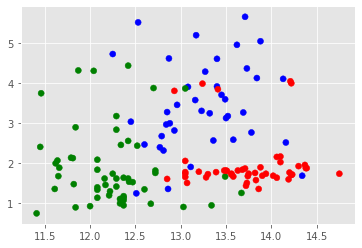

In [40]:
fig, ax = plt.subplots()

X_plot = X_train
X_plot['y'] = y_train
X_plot['color'] = np.where(X_plot['y'] == 0, 'r', np.where(X_plot['y'] == 1, 'g', 'b'))
    
ax.scatter(X_plot[0], X_plot[1], color = X_plot['color']);

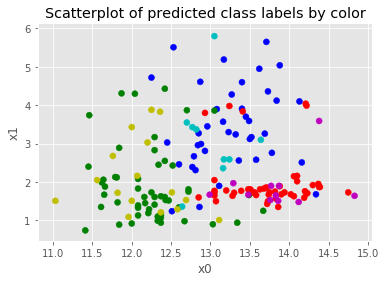

In [48]:
# Performing kNN classification
knn_model = KNN(n_neighbors = k)
knn_model.fit(X_train[[0,1]], y_train)

# Predict class labels for test set
y_pred = knn_model.predict(X_test[[0,1]])

# Predict probabilities of class labels for test set
y_prob = knn_model.predict_proba(X_test[[0,1]])

fig, ax = plt.subplots()

X_plot = X_train
X_plot_test = X_test

X_plot['y'] = y_train
X_plot_test['y'] = y_pred
y_pred

X_plot['color'] = np.where(X_plot['y'] == 0, 'r', np.where(X_plot['y'] == 1, 'g', 'b'))
X_plot_test['color'] = np.where(X_plot_test['y'] == 0, 'm', np.where(X_plot_test['y'] == 1, 'y', 'c'))
    
ax.scatter(X_plot[0], X_plot[1], color = X_plot['color']);
ax.scatter(X_plot_test[0], X_plot_test[1], color = X_plot_test['color']);
ax.set(title = 'Scatterplot of predicted class labels by color', 
       xlabel = 'x0', 
       ylabel = 'x1');

# Logistic regression

This classification technique is used in a slightly different situation than kNN. In the vast majority of cases, we use logistic regression to estimate the probability that observations in a dataset are in one of two classes. Hence, we are not directly placing observations into a class, but we're finding their *probability* or *likelihood* of belonging to a particular class.

Since we only use logistic regression for the two-class problem, we can represent the two classes as 0 and 1. This can also be thought of as the probability of 'success' (class is 1) or 'failure' (class is 0) for observations in a given dataset. As with other classification problems, we separate the data into training, evaluation, and testing sets. We write 'the probability of success *given* the training set $X$' as $P(\text{class} = 1 | X)$.

The mathematical expression for this estimated probability is called the logistic or 'sigmoid' function. It's called the 'sigmoid' function because, when plotted, the curve looks like the letter 'S' ('Sigma' is the Greek 'S'). For this reason, the function is often denoted by $\sigma$. The expression for this function is
$$
    P(\text{class} = 1 | X) = \sigma(X) = \frac{e^{\beta_0 + \beta_1X}}{1 + e^{\beta_0 + \beta_1X}}.
$$

Let's plot the sigmoid function with various values of $\beta_0$ and $\beta_1$ and some evenly spaced $X$ values between -10 and 10.

In [30]:
@interact
def plot_sigmoid(b0 = (-10.0,10.0,0.1), b1 = (-10.0,10.0,0.1)):
    """ Plotting the sigmoid or 'logistic' function. """
    
    x = np.linspace(-10,10,201)
    
    def sigmoid(x, b0 = b0, b1 = b1):
        return np.exp(b0 + b1*x)/(1+np.exp(b0 + b1*x))

    fig, ax = plt.subplots(figsize=(8,8))

    x = np.linspace(-10,10,201)

    ax.plot(x, sigmoid(x))
    ax.grid(True)
    ax.set(title = 'Plot of logistic (sigmoid) function $\sigma(x)$', 
           xlabel = r'$x$', 
           ylabel = r'$\sigma(x)$', 
           ylim = [-0.2, 1.2]);

interactive(children=(FloatSlider(value=0.0, description='b0', max=10.0, min=-10.0), FloatSlider(value=0.0, de…

The above expression for the probability is useful for visualizations, but the actual calculations to estimate the $\beta_0$ and $\beta_1$ parameters use what is called the 'log-odds' or 'logit' function, defined by
$$
    \log\left(\frac{\sigma(X)}{1-\sigma(X)}\right) = \beta_0 + \beta_1X,
$$
where $\frac{\sigma(X)}{1-\sigma(X)}$ is the 'odds' or 'probability of success'.

The exact process of estimating the parameters of this function requires calculus (Maximum Likelihood Estimation), so we won't discuss that here. Instead, let's look at how to perform a logistic regression using sklearn and Python.

## *Example:* Logistic regression

Can total cholesterol levels predict the probability of coronary heart disease? Our dataset comes from the Framingham Heart study, a [long-term study](https://en.wikipedia.org/wiki/Framingham_Heart_Study) in the risk of heart disease that has been ongoing since 1948. The dataset was obtained from [Kaggle](https://www.kaggle.com/amanajmera1/framingham-heart-study-dataset), a popular online community of data analysts of all skill levels. The dataset has the following columns:

* `male` - 0 = Female, 1 = Male
* `age` - age at exam time
* `education` - 1 = Some High School, 2 = High School or GED, 3 = Some College or Vocational School, 4 = college
* `currentSmoker` - 0 = nonsmoker, 1 = smoker
* `cigsPerDay` - number of cigarettes smoked per day (estimated average)
* `BPMeds` - 0 = not on blood pressure medications, 1 = is on blood pressure medications
* `prevalentStroke` - 1 = has had a stroke, 0 = no stroke
* `prevalentHyp` - 1 = has hypertension, 0 = no hypertension
* `diabetes` - 1 = yes, 0 = no
* `totChol` - mg/dL
* `sysBP` - mmHg
* `diaBP` - mmHg
* `BMI` - Body Mass Index calculated as: weight (kg)/height(meters-squared)
* `heartRate` - beats/min (Ventricular)
* `glucose` - mg/dL
* `TenYearCHD` - 1 = coronary heart disease 10 years from exam time, 0 = no coronary heart disease

We'll load in the data and put the `totChol` column into a variable called `X` and put the `TenYearCHD` into a variable called `y`. We'll further split our data into training and testing sets for respectively estimating parameters and evaluating our final model (we won't use an evaluation set to update our parameters). 

To make things easier, we'll drop missing values. We'll also set aside 20% of the data for the test set.

In [22]:
fram = pd.read_csv('framingham.csv')
fram.dropna(inplace = True)
fram

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4237,0,52,2.0,0,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.0,0
4238,1,40,3.0,0,0.0,0.0,0,1,0,185.0,141.0,98.0,25.60,67.0,72.0,0


In [23]:
train, test = train_test_split(fram[['totChol','TenYearCHD']], test_size = 0.2)

# LogisticRegression function only wants NumPy arrays for X values
X_train = np.array(train['totChol']).reshape(-1,1)
y_train = np.array(train['TenYearCHD'])

X_test = np.array(test['totChol'].sort_values()).reshape(-1,1)
y_test = test['TenYearCHD']

Let's make a scatterplot of the training data just to see if we can visually fit a sigmoid curve to the data.

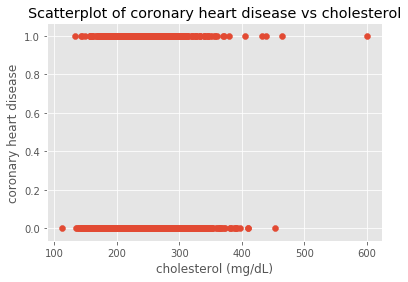

In [24]:
fig, ax = plt.subplots()

ax.scatter(X_train, y_train);
ax.set(title = 'Scatterplot of coronary heart disease vs cholesterol', 
       xlabel = 'cholesterol (mg/dL)', 
       ylabel = 'coronary heart disease');

Now we'll estimate the logistic regression parameters.

In [25]:
from sklearn.linear_model import LogisticRegression

logit = LogisticRegression()
logit.fit(X_train, y_train)

# Displaying the parameters from the regression
b0 = logit.intercept_
b1 = logit.coef_[0]
print('b0 = {}, b1 = {}'.format(b0, b1))

b0 = [-3.24293601], b1 = [0.00642959]


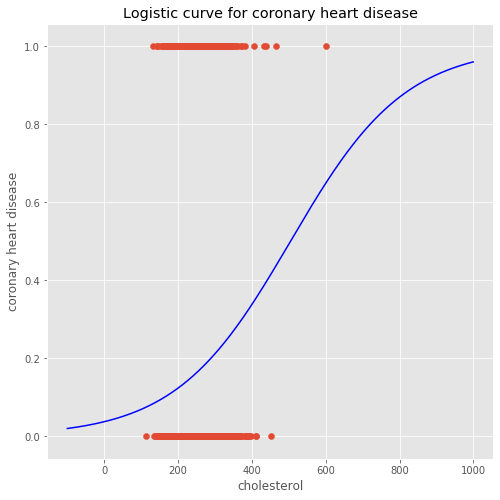

In [28]:
""" Predicting probability of heart disease for a special 'plotting' set.
    The predict_proba() method returns an array with two columns of the form:
    [[probability of 'failure', probability of 'success']]
    
    This is a little messed up, since coronary heart disease is by no means 
    a 'success'.
"""

x_plot = np.arange(-100,1000,0.5).reshape(-1, 1)
y_prob = logit.predict_proba(x_plot)

fig, ax = plt.subplots(figsize = (8,8))

# y_pred = np.exp(sigmoid(X_test, b0, b1))
ax.scatter(X_train, y_train);
# ax.set_xlim([0,700])
ax.plot(x_plot, y_prob[:,1], color = 'b');

ax.set(title = 'Logistic curve for coronary heart disease', 
       xlabel = 'cholesterol', 
       ylabel = 'coronary heart disease');

In [29]:
# Displaying the testing accuracy
accuracy = logit.score(X_test, y_test)

print('Logistic regression achieved {:.4f} % accuracy on the test set.'.format(accuracy*100))

Logistic regression achieved 86.2022 % accuracy on the test set.


## Multiple logistic regression

This is a relatively simple extension of logistic regression. Instead of using one variable to predict the log-odds, we use several. Therefore, the logit function now looks like this:
$$
    \log\left(\frac{\sigma(X)}{1-\sigma(X)}\right) = \beta_0 + \beta_1X_1 + \beta_2X_2 + \cdots + \beta_pX_p,
$$
where each $X_i$ represents an independent variable (usually a column of data).

## *Example:* Multiple logistic regression

Let's see if we can better predict coronary heart disease using more variables. We'll use `cigsPerDay`, `totChol`, `BMI`, `heartRate`, and `glucose` as our predictor variables.

In [31]:
# Loading and splitting the data
fram = pd.read_csv('framingham.csv')
fram.dropna(inplace = True)
data = fram[['cigsPerDay','totChol','BMI','heartRate','glucose','TenYearCHD']]

train, test = train_test_split(data, test_size = 0.2)

X_train = train.drop('TenYearCHD', axis = 1)
y_train = np.array(train['TenYearCHD'])

X_test = test.drop('TenYearCHD', axis = 1)
y_test = test['TenYearCHD']

In [32]:
mlogit = LogisticRegression()
mlogit.fit(X_train, y_train)

# Displaying the parameters from the regression
b0 = mlogit.intercept_
b = mlogit.coef_[0]
print('Coefficients from the multivariate logit function:')
print('b0 = {}, b = {}'.format(b0, b))

Coefficients from the multivariate logit function:
b0 = [-5.31412445], b = [ 0.01389752  0.00601924  0.05572721 -0.00284757  0.00943811]


In [33]:
# Displaying the testing accuracy
accuracy = mlogit.score(X_test, y_test)

print('Multiple logistic regression achieved {:.4f} % accuracy on the test set.'.format(accuracy*100))

Multiple logistic regression achieved 85.7923 % accuracy on the test set.


While it is also possible to extend logistic regression to multiple classes, it isn't done very often. Other methods are simpler and work just as well. However, one way to implement an easy multi-class logistic regression is to use a one-vs-rest approach. This can be done by isolating one class and then lumping all other classes together, then proceeding with logistic regression. This can be repeated for each class.

# Summary

* The three steps for building statistical models are training, validating, and testing.
* Mean-square error (MSE) is most often used to assess the accuracy of a model.
* k-Nearest Neighbors (kNN) works by grouping together data points that are 'close' to each other.
* Logistic regression is used to predict the probability of 'success' or 'failure'. Equivalently, it predicts the probability of an observation being in one of two classes.
* Multiple (or multivariate) logistic regression uses more than one independent variable to predict the probability of an observation being in one of two classes.

# *Exercises*

1. With the Framingham heart study data, use kNN with $k=3$ to estimate coronary heart disease based on total cholesterol. Compare the results to the logistic regression above.

In [87]:
fram = pd.read_csv('framingham.csv')
fram.dropna(inplace = True)

train, test = train_test_split(fram[['totChol','TenYearCHD']], test_size = 0.2)

X_train = np.array(train['totChol']).reshape(-1,1)
y_train = np.array(train['TenYearCHD'])

X_test = np.array(test['totChol']).reshape(-1,1)
y_test = test['TenYearCHD']

k = 3

# Performing kNN classification
knn_model = KNN(n_neighbors = k)
knn_model.fit(X_train, y_train)

# Logistic regression for comparison
logit = LogisticRegression()
logit.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [88]:
# View the mean accuracy of the kNN model and logistic regression
accuracy_kNN = knn_model.score(X_test, y_test)
accuracy_log = logit.score(X_test, y_test)

print('Logistic regression achieved {:.4f} % accuracy on the test set.'.format(accuracy*100))
print('kNN classifier accuracy with k = {}: {:.4f} %'.format(k, 100*accuracy_kNN))

Logistic regression achieved 86.3388 % accuracy on the test set.
kNN classifier accuracy with k = 3: 80.6011 %


2. Use all predictor variables in the Framingham dataset to predict the probability of coronary heart disease (multiple logistic regression). Compare the results to the results above.

In [89]:
from sklearn import preprocessing

fram = pd.read_csv('framingham.csv')
fram.dropna(inplace = True)

train, test = train_test_split(fram, test_size = 0.2)

X_train = preprocessing.scale(train.drop('TenYearCHD', axis = 1))
y_train = np.array(train['TenYearCHD'])

X_test = preprocessing.scale(test.drop('TenYearCHD', axis = 1))
y_test = test['TenYearCHD']

In [90]:
mlogit = LogisticRegression()
mlogit.fit(X_train, y_train)

# Displaying the parameters from the regression
b0 = mlogit.intercept_
b = mlogit.coef_[0]
print('Coefficients from the multivariate logit function:')
print('b0 = {}, b = {}'.format(b0, b))

Coefficients from the multivariate logit function:
b0 = [-1.97737993], b = [ 0.29878054  0.51640526 -0.00511619  0.10779228  0.13795701  0.01846518
  0.0529764   0.1304925   0.03045319  0.10457663  0.32357371 -0.03956055
 -0.00570292 -0.01704682  0.1699709 ]


In [91]:
# Displaying the testing accuracy
accuracy = mlogit.score(X_test, y_test)

print('Multiple logistic regression achieved {:.4f} % accuracy on the test set.'.format(accuracy*100))

Multiple logistic regression achieved 85.6557 % accuracy on the test set.


3. Use kNN on the Framingham heart data with all predictors to predict class (coronary heart disease). Compare to the multiple logistic regression above.

In [113]:
fram = pd.read_csv('framingham.csv')
fram.dropna(inplace = True)

train, test = train_test_split(fram, test_size = 0.2)

X_train = train.drop('TenYearCHD', axis = 1)
y_train = np.array(train['TenYearCHD'])

X_test = test.drop('TenYearCHD', axis = 1)
y_test = test['TenYearCHD']

k = 5

# Performing kNN classification
knn_model = KNN(n_neighbors = k)
knn_model.fit(X_train, y_train)

accuracy_kNN = knn_model.score(X_test, y_test)
print('kNN classifier accuracy with k = {}: {:.4f} %'.format(k, 100*accuracy_kNN))

kNN classifier accuracy with k = 5: 81.9672 %


4. Using a one-vs-rest scheme, use multiple logistic regression on the wine dataset to predict the probability that a wine is in class 0 or class 1 (which is both class 1 and 2 combined).